# Regression project

Imports and firsts steps

In [2]:
import pandas as pd
import numpy as np
import os
import random
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.base import clone

In [3]:
RANDOM_VALUE = 21

In [4]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')

In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [7]:
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

We have a lot of float values and I think, they could be the most important for our models and predictions. But alse we have `Unnamed: 15` & `Unnamed: 16` felds, wich haven't got any important valueses may be this is good info to drop them from df.

In [8]:
df = df.drop(['Unnamed: 15','Unnamed: 16'], axis=1)

In [9]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check rows and when we find rows, wich consist only of `NaN` values -> drop them.

In [10]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.all(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df.drop(rows_with_NaN.index)

In [12]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Rename columns, because it is hard to use it now.

In [283]:
df.rename(columns={'CO(GT)':'COGT',
                                    'PT08.S1(CO)':'PT08S1CO',
                                    'NMHC(GT)':'NMHCGT',
                                    'PT08.S2(NMHC)':'PT08S2NMHC',
                                    'NOx(GT)':'NOxGT',
                                    'PT08.S3(NOx)':'PT08S3NOx',
                                    'NO2(GT)':'NO2GT',
                                    'PT08.S4(NO2)':'PT08S4NO2',
                                    'PT08.S5(O3)':'PT08S5O3',
                                    'C6H6(GT)':'C6H6GT'}, inplace=True)

In [284]:
TARGET = 'C6H6GT'

In [285]:
df.shape

(9357, 15)

Nice:)

In [286]:
spliting = round(df.shape[0]*0.7)

In [287]:
spliting

6550

In [288]:
train = df.iloc[:spliting,:]
test = df.iloc[spliting:,:]

In [289]:
new_train = train.copy()
new_train[TARGET] = pd.to_numeric(train[TARGET], errors='coerce')
train[TARGET].replace()

0       11.9
1        9.4
2        9.0
3        9.2
4        6.5
        ... 
6545     9.8
6546     9.5
6547    11.2
6548     6.9
6549     4.6
Name: C6H6GT, Length: 6550, dtype: float64

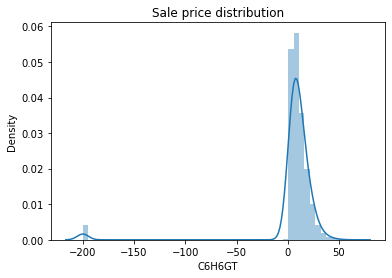

In [290]:
ax = sns.distplot(new_train[TARGET], norm_hist=True)
ax.set_title('Sale price distribution');

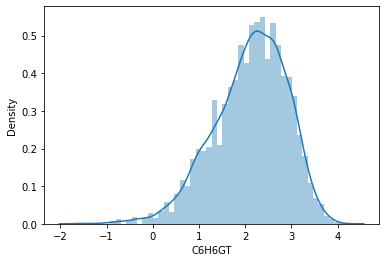

In [291]:
ax = sns.distplot(np.log(new_train[TARGET]), norm_hist=True)

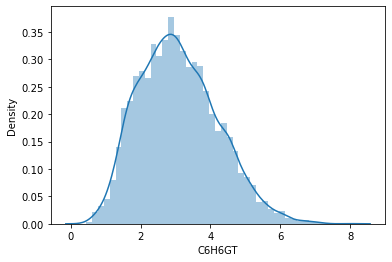

In [292]:
ax = sns.distplot(np.sqrt(new_train[TARGET]), norm_hist=True)

In [293]:
new_train[TARGET].mean()

6.006671755725197

In [294]:
new_train[TARGET].var()

1038.3659670857014

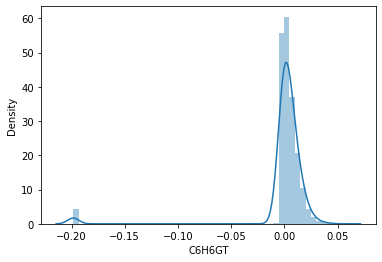

In [295]:
ax = sns.distplot((new_train[TARGET]-new_train[TARGET].mean())/new_train[TARGET].var(), norm_hist=True)

We can see, that this frame has one or more such small value. May be we will use this fact in next steps.

# Piplayn

In [296]:
CATEGORICAL = df.select_dtypes(include=['object']).columns.tolist()
NUMERICAL = df.select_dtypes(exclude=['object']).columns.tolist()

In [297]:
CATEGORICAL

['Date', 'Time']

In [298]:
NUMERICAL

['COGT',
 'PT08S1CO',
 'NMHCGT',
 'C6H6GT',
 'PT08S2NMHC',
 'NOxGT',
 'PT08S3NOx',
 'NO2GT',
 'PT08S4NO2',
 'PT08S5O3',
 'T',
 'RH',
 'AH']

In [299]:
if TARGET in NUMERICAL:
    NUMERICAL.remove(TARGET)

In [300]:
train = df.loc[df[TARGET].notnull()]
test = df.loc[df[TARGET].isnull()]

In [301]:
train = df.iloc[:spliting,:]
test = df.iloc[spliting:,:]

train_test_model_max = train.query('T>-150')
train_test_model_min = train.query('T<0')

In [302]:
train_test_model_max

,Date,Time,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,08/12/2004,11.00.00,2.3,1206.0,-200.0,9.8,969.0,363.0,701.0,95.0,1365.0,1178.0,14.3,63.3,1.0266
6546,08/12/2004,12.00.00,2.1,1202.0,-200.0,9.5,958.0,302.0,732.0,92.0,1330.0,1181.0,16.0,58.1,1.0482
6547,08/12/2004,13.00.00,2.7,1261.0,-200.0,11.2,1022.0,424.0,635.0,113.0,1407.0,1250.0,17.3,53.9,1.0562
6548,08/12/2004,14.00.00,2.3,1102.0,-200.0,6.9,855.0,258.0,763.0,98.0,1279.0,1039.0,17.3,53.3,1.0407


In [303]:
train_test_model_min.shape[0] - train_test_model_min.query('PT08S2NMHC==-200').shape[0]

0

Let see correlation between values and `TARGET`. We do it for all data and alse for part without -200 value.

<AxesSubplot:>

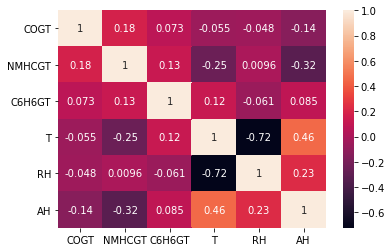

In [304]:
corr = train_test_model_max.corr()
condition = np.abs(corr[TARGET]) < 0.2
condition[TARGET] = True
top_corr = corr.loc[condition,condition]
sns.heatmap(top_corr, annot=True)

<AxesSubplot:>

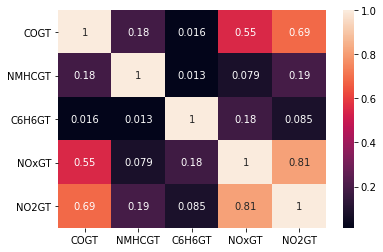

In [305]:
corr = train.corr()
condition = np.abs(corr[TARGET]) < 0.2
condition[TARGET] = True
top_corr = corr.loc[condition,condition]
sns.heatmap(top_corr, annot=True)

<AxesSubplot:>

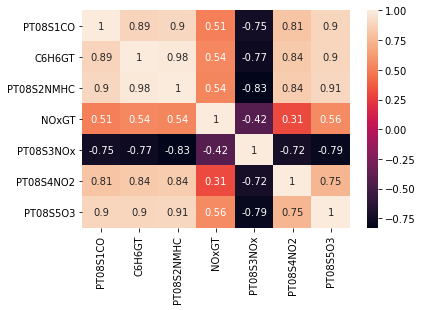

In [306]:
corr = train_test_model_max.corr()
condition = np.abs(corr[TARGET]) > 0.5
top_corr = corr.loc[condition,condition]
sns.heatmap(top_corr, annot=True)

This is the most interesting columns doe to the fact that the haven't big correlation between each other, but the all may be so important for our regresion.

In [314]:
corr = train_test_model_min.corr()
NOT_DROP = ['PT08S1CO', 'PT08S2NMHC', 'PT08S4NO2', 'PT08S5O3', 'AH']
corr

,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
COGT,1.000000,NaN,0.247503,NaN,NaN,0.799581,NaN,0.851206,NaN,NaN,NaN,NaN,NaN
PT08S1CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NMHCGT,0.247503,NaN,1.000000,NaN,NaN,0.454414,NaN,0.324151,NaN,NaN,NaN,NaN,NaN
C6H6GT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT08S2NMHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOxGT,0.799581,NaN,0.454414,NaN,NaN,1.000000,NaN,0.962981,NaN,NaN,NaN,NaN,NaN
PT08S3NOx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO2GT,0.851206,NaN,0.324151,NaN,NaN,0.962981,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
PT08S4NO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT08S5O3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

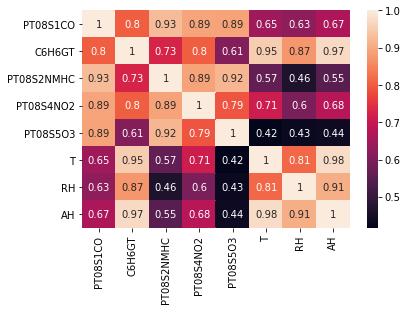

In [315]:
corr = train.corr()
condition = np.abs(corr[TARGET]) > 0.5
top_corr = corr.loc[condition,condition]
sns.heatmap(top_corr, annot=True)

In [316]:
condition

COGT          False
PT08S1CO       True
NMHCGT        False
C6H6GT         True
PT08S2NMHC     True
NOxGT         False
PT08S3NOx     False
NO2GT         False
PT08S4NO2      True
PT08S5O3       True
T              True
RH             True
AH             True
Name: C6H6GT, dtype: bool

<AxesSubplot:xlabel='PT08S1CO', ylabel='PT08S5O3'>

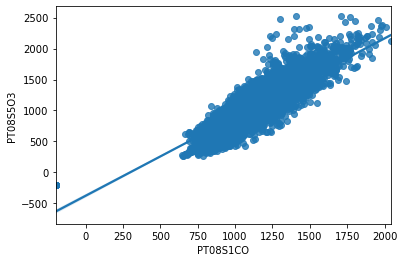

In [317]:
sns.regplot('PT08S1CO', 'PT08S5O3', train)

<AxesSubplot:xlabel='PT08S2NMHC', ylabel='C6H6GT'>

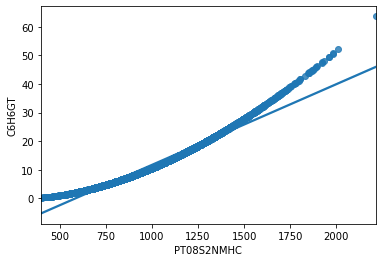

In [39]:
sns.regplot('PT08S2NMHC', TARGET, train_test_model_max)

In [40]:
train.query('T>-150')

,Date,Time,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,08/12/2004,11.00.00,2.3,1206.0,-200.0,9.8,969.0,363.0,701.0,95.0,1365.0,1178.0,14.3,63.3,1.0266
6546,08/12/2004,12.00.00,2.1,1202.0,-200.0,9.5,958.0,302.0,732.0,92.0,1330.0,1181.0,16.0,58.1,1.0482
6547,08/12/2004,13.00.00,2.7,1261.0,-200.0,11.2,1022.0,424.0,635.0,113.0,1407.0,1250.0,17.3,53.9,1.0562
6548,08/12/2004,14.00.00,2.3,1102.0,-200.0,6.9,855.0,258.0,763.0,98.0,1279.0,1039.0,17.3,53.3,1.0407


In [41]:
train['NMHCGT']

0       150.0
1       112.0
2        88.0
3        80.0
4        51.0
        ...  
6545   -200.0
6546   -200.0
6547   -200.0
6548   -200.0
6549   -200.0
Name: NMHCGT, Length: 6550, dtype: float64

<AxesSubplot:xlabel='NMHCGT', ylabel='Density'>

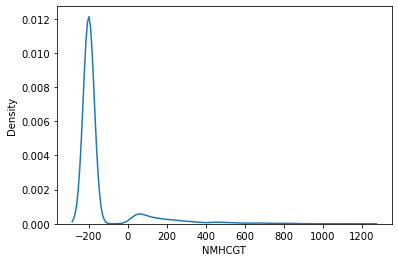

In [42]:
sns.kdeplot(train['NMHCGT'])

In [43]:
train.query('NMHCGT!=-200')

,Date,Time,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,30/04/2004,20.00.00,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345
1227,30/04/2004,21.00.00,3.1,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529
1228,30/04/2004,22.00.00,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579
1229,30/04/2004,23.00.00,3.1,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422


<AxesSubplot:xlabel='NMHCGT', ylabel='C6H6GT'>

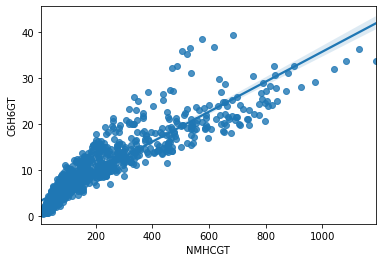

In [318]:
sns.regplot('NMHCGT', TARGET, train_test_model_max.query('NMHCGT!=-200'))

<AxesSubplot:>

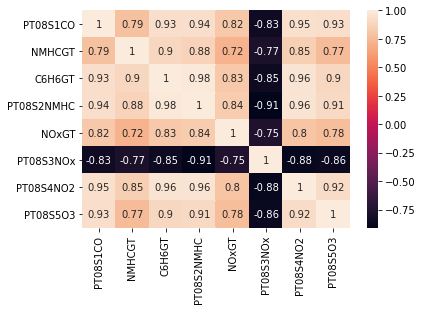

In [319]:
corr = train_test_model_max.query('NMHCGT!=-200').corr()
condition = np.abs(corr[TARGET]) > 0.7
top_corr = corr.loc[condition,condition]
sns.heatmap(top_corr, annot=True)

In [320]:
DROP.append('NMHCGT')
DROP.append('Date')
DROP.append('Time')

In [321]:
df.isna().sum()

Date          0
Time          0
COGT          0
PT08S1CO      0
NMHCGT        0
C6H6GT        0
PT08S2NMHC    0
NOxGT         0
PT08S3NOx     0
NO2GT         0
PT08S4NO2     0
PT08S5O3      0
T             0
RH            0
AH            0
dtype: int64

In [326]:
train[NOT_DROP]

,PT08S1CO,PT08S2NMHC,PT08S4NO2,PT08S5O3,AH
0,1360.0,1046.0,1692.0,1268.0,0.7578
1,1292.0,955.0,1559.0,972.0,0.7255
2,1402.0,939.0,1555.0,1074.0,0.7502
3,1376.0,948.0,1584.0,1203.0,0.7867
4,1272.0,836.0,1490.0,1110.0,0.7888
...,...,...,...,...,...
6545,1206.0,969.0,1365.0,1178.0,1.0266
6546,1202.0,958.0,1330.0,1181.0,1.0482
6547,1261.0,1022.0,1407.0,1250.0,1.0562
6548,1102.0,855.0,1279.0,1039.0,1.0407


In [327]:
X_train, y_train = train[NOT_DROP], train[TARGET]

In [328]:
X_test, y_test = test[NOT_DROP], test[TARGET]

In [329]:
y_test.isna().sum()

0

In [330]:
train.drop(DROP, axis=1)[TARGET]

0       11.9
1        9.4
2        9.0
3        9.2
4        6.5
        ... 
6545     9.8
6546     9.5
6547    11.2
6548     6.9
6549     4.6
Name: C6H6GT, Length: 6550, dtype: float64

In [331]:
X_train

,PT08S1CO,PT08S2NMHC,PT08S4NO2,PT08S5O3,AH
0,1360.0,1046.0,1692.0,1268.0,0.7578
1,1292.0,955.0,1559.0,972.0,0.7255
2,1402.0,939.0,1555.0,1074.0,0.7502
3,1376.0,948.0,1584.0,1203.0,0.7867
4,1272.0,836.0,1490.0,1110.0,0.7888
...,...,...,...,...,...
6545,1206.0,969.0,1365.0,1178.0,1.0266
6546,1202.0,958.0,1330.0,1181.0,1.0482
6547,1261.0,1022.0,1407.0,1250.0,1.0562
6548,1102.0,855.0,1279.0,1039.0,1.0407


In [332]:
NUMERICAL

['COGT',
 'PT08S1CO',
 'NMHCGT',
 'PT08S2NMHC',
 'NOxGT',
 'PT08S3NOx',
 'NO2GT',
 'PT08S4NO2',
 'PT08S5O3',
 'T',
 'RH',
 'AH']

In [333]:
numerical_def = gen_features(
    columns=[[c] for c in NOT_DROP],
    classes=[
        {'class': StandardScaler}
    ]
)
features = numerical_def

In [334]:
df.shape

(9357, 15)

In [335]:
mapper = DataFrameMapper(numerical_def)
len(numerical_def)

5

In [245]:
NUMERICAL = X_train.select_dtypes(exclude=['object']).columns.tolist()

In [249]:
NUMERICAL

['COGT', 'PT08S2NMHC', 'NOxGT', 'NO2GT']

In [336]:
train_X_tr = pd.DataFrame(mapper.fit_transform(X_train))
val_X_tr = pd.DataFrame(mapper.transform(X_test))


train_y_tr = y_train
val_y_tr = y_test

In [337]:
y_test[6740]

-200.0

In [338]:
linreg = LinearRegression()
linreg.fit(train_X_tr, train_y_tr)
print(f'\nR2 Score: {linreg.score(val_X_tr, val_y_tr)}')


R2 Score: 0.9992740654236287


In [339]:
train_X_tr.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [340]:
predictions = linreg.predict(val_X_tr)

mae = metrics.mean_absolute_error(val_y_tr, predictions)
mse = metrics.mean_squared_error(val_y_tr, predictions)
r2 = metrics.r2_score(val_y_tr, predictions)
rmse = np.sqrt(metrics.mean_squared_error(val_y_tr, predictions))

pd.DataFrame.from_dict({'MAE':mae, 'MSE':mse, 'R2':r2, 'RMSE':rmse}, orient='index', columns=['Score'])

,Score
MAE,1.057755
MSE,2.287667
R2,0.999274
RMSE,1.512504


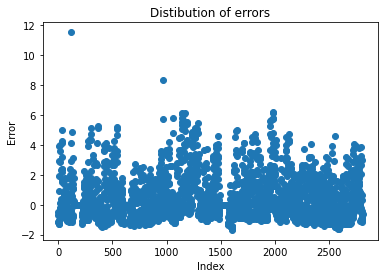

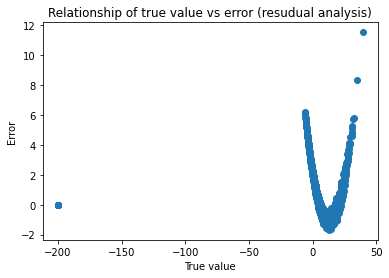

In [341]:
pred = linreg.predict(val_X_tr)
errors = val_y_tr - pred

plt.scatter(list(range(len(errors))),errors);
plt.title("Distibution of errors")
plt.ylabel('Error');
plt.xlabel('Index');
plt.show();

plt.scatter(pred,errors);
plt.title('Relationship of true value vs error (resudual analysis)')
plt.ylabel('Error');
plt.xlabel('True value');
plt.show();

# Pipeline

In [342]:
def evaluate_model(train, val, tr_y, val_y, pipeline):
    pipeline.fit(train, tr_y)
    pred_val = pipeline.predict(val)
    pred_train = pipeline.predict(train)
    mapper = pipeline.named_steps['mapper']

    return pd.DataFrame({
        'train_RMSE': [np.sqrt(mean_squared_error(tr_y, pred_train))], 
        'train_R2': [r2_score(tr_y, pred_train)],
        'val_RMSE': [np.sqrt(mean_squared_error(val_y, pred_val))],
        'val_R2': [r2_score(val_y, pred_val)]
    }), mapper.transformed_names_

In [343]:
pipeline = Pipeline([
    ('mapper', mapper),
    ('estimator', LinearRegression())
])

In [344]:
train_X = X_train
val_X = X_test

In [345]:
scores, _ = evaluate_model(train_X, val_X, train_y_tr, val_y_tr, pipeline)
scores

,train_RMSE,train_R2,val_RMSE,val_R2
0,1.430475,0.998029,1.512504,0.999274


# Drop some features (turned out to be a bad idea, but I tried)

In [222]:
corr = train_test_model_max.corr()
ind = np.abs(corr[TARGET]) > 0.5
top_corr = corr[TARGET][ind].index.tolist()
top_corr.remove(TARGET)

In [223]:
top_corr

['PT08S1CO', 'PT08S2NMHC', 'NOxGT', 'PT08S3NOx', 'PT08S4NO2', 'PT08S5O3']

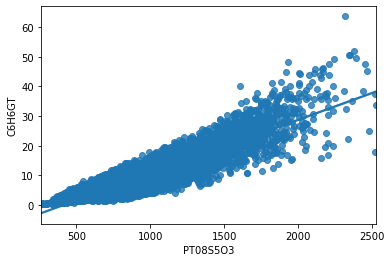

In [224]:
sns.regplot(y=TARGET, x='PT08S5O3', data=train_test_model_max);

<AxesSubplot:xlabel='PT08S1CO', ylabel='Density'>

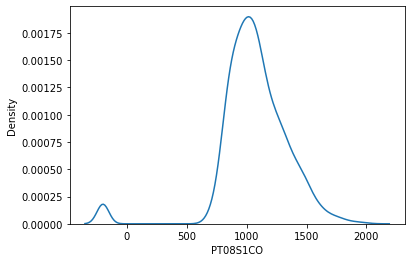

In [225]:
sns.kdeplot(train['PT08S1CO'])

In [226]:
train.query('T==-200')

,Date,Time,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH,False_checker
524,01/04/2004,14.00.00,1.7,-200.0,222.0,-200.0,-200.0,99.0,-200.0,72.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200
525,01/04/2004,15.00.00,1.9,-200.0,197.0,-200.0,-200.0,108.0,-200.0,81.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200
526,01/04/2004,16.00.00,2.3,-200.0,319.0,-200.0,-200.0,131.0,-200.0,93.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200
701,08/04/2004,23.00.00,2.0,-200.0,137.0,-200.0,-200.0,129.0,-200.0,106.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200
702,09/04/2004,00.00.00,2.4,-200.0,189.0,-200.0,-200.0,154.0,-200.0,109.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,08/09/2004,14.00.00,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200
4365,08/09/2004,15.00.00,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200
4366,08/09/2004,16.00.00,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200
4367,08/09/2004,17.00.00,3.4,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200


In [281]:
df.drop(['False_checker'], axis=1, inplace=True)

KeyError: "['False_checker'] not found in axis"

In [282]:
df

,Date,Time,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [229]:
top_corr.append('False_checker')

In [230]:
#top_corr.append('NOxGT')
top_corr

['PT08S1CO',
 'PT08S2NMHC',
 'NOxGT',
 'PT08S3NOx',
 'PT08S4NO2',
 'PT08S5O3',
 'False_checker']

In [231]:
top_corr_features = [f for f in features if f[0][0] in top_corr]
pipeline = Pipeline([
    ('mapper', DataFrameMapper(top_corr_features)),
    ('estimator', LinearRegression())
])

In [237]:
features

[(['COGT'], [StandardScaler()], {}),
 (['PT08S2NMHC'], [StandardScaler()], {}),
 (['NOxGT'], [StandardScaler()], {}),
 (['NO2GT'], [StandardScaler()], {})]

In [232]:
scores, _ = evaluate_model(train_X, val_X, train_y_tr, val_y_tr, pipeline)
scores

,train_RMSE,train_R2,val_RMSE,val_R2
0,21.260137,0.564641,32.038545,0.674276


# Regularization

In [346]:
def plot_importance(est, colnames, top_n=20):
    importance = pd.DataFrame({
        'abs_weight': np.abs(est.coef_),
        'feature': colnames
    })
    imp20 = importance.sort_values(by='abs_weight', ascending=False)[:top_n]
    sns.barplot(y='feature', x='abs_weight', data=imp20, orient='h');

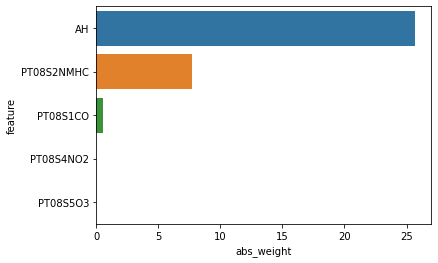

In [347]:
lasso = Lasso()
pipeline = Pipeline([('mapper', mapper), 
                     ('estimator', lasso)])
train_y = y_train
val_y = y_test
scores, colnames = evaluate_model(train_X, val_X, train_y, val_y, pipeline)
scores

plot_importance(pipeline.named_steps['estimator'], colnames)

In [350]:
scores

,train_RMSE,train_R2,val_RMSE,val_R2
0,1.831399,0.996769,2.303558,0.998316


In [351]:
SEED = 21
cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
pipeline = Pipeline([
    ('mapper', mapper),
    ('estimator', ElasticNet(random_state=SEED))
])
grid = {
    'estimator__alpha': np.linspace(0, 300, 10),
    'estimator__l1_ratio': np.arange(0, 1.1, 0.1)
}
gs = GridSearchCV(pipeline, grid, 
                  n_jobs=-1, 
                  scoring=['neg_mean_squared_error', 'r2'], 
                  refit='neg_mean_squared_error', 
                  cv=cv)

In [352]:
gs.fit(train_X, train_y);

In [353]:
gs.best_params_

{'estimator__alpha': 0.0, 'estimator__l1_ratio': 0.0}

In this task I try use lasso and grid methods, but the don't give me same good resalts. I have big `R2` value, becase in my code I use one feature, wich corr a lot with -200 value and three values, wich have good corr with other `TARGET` values